# Feature Extraction and Model Building
Since, from EDA we know that there is a good chunk of Not determined outcomes so in this notebook done two experiments which are:
1. Predict the 'Not determined' outcome and then train the model
2. Train the models only using determined outcomes

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

### Load Datatset and Feature Processing for predicting Not determined Outcomes
1. For preprocessing: Deleted All Not determined Outcomes and set the index as Patient ID
2. For features encoded categorical variables using label_encoder and used age and last days from surgery as parameter


In [119]:
# Load the dataset
patient_records = pd.read_csv('patient_records.csv')
patient_records.drop('Unnamed: 0', axis = 1, inplace=True)
patient_records.set_index('Patient ID', inplace=True)
# Handle 'Non Determined' values in the Outcome column by replacing it with null value
patient_records['Outcome'] = patient_records['Outcome'].replace('Not determined', np.nan)

# Separate the data into two parts: determined and non-determined outcomes
determined = patient_records.dropna(subset=['Outcome'])
non_determined = patient_records[patient_records['Outcome'].isna()]
print(len(determined))

# Encode categorical variables in the determined dataset
label_encoder = {}
categorical_columns = ['Gender', 'Outcome', 'Surgery Type'] # Add other categorical columns as needed
for col in categorical_columns:
    le = LabelEncoder()
    determined[col] = le.fit_transform(determined[col])
    label_encoder[col] = le


# Alternatively, can fill missing values but for this assignment only using prediction method and not interpolation
# patient_records_cleaned['Outcome'] = patient_records_cleaned['Outcome'].fillna('Some Value')



387


/var/folders/dn/_z78g72x2453h233_6_pcg000000gn/T/ipykernel_89537/1526408592.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  determined[col] = le.fit_transform(determined[col])
/var/folders/dn/_z78g72x2453h233_6_pcg000000gn/T/ipykernel_89537/1526408592.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  determined[col] = le.fit_transform(determined[col])
/var/folders/dn/_z78g72x2453h233_6_pcg000000gn/T/ipykernel_89537/1526408592.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [120]:
# Define features and target for the determined dataset
X_determined = determined.drop(['Outcome'], axis=1)
y_determined = determined['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_determined, y_determined, test_size=0.1, random_state=42)
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# print(X_train_scaled)

Using Random Forest Classifier for the prediction

In [121]:
# Initialize and train a model (e.g., Random Forest)
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Evaluate the model
y_pred = random_forest.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7692307692307693
Confusion Matrix:
 [[ 3  5]
 [ 4 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.84      0.87      0.86        31

    accuracy                           0.77        39
   macro avg       0.64      0.62      0.63        39
weighted avg       0.76      0.77      0.76        39



### Predicting 'Non Determined' Outcomes

In [122]:
# Prepare the non-determined dataset for prediction

# Encode categorical variables in the non-determined dataset
for col in ['Gender', 'Surgery Type']:
    non_determined[col] = label_encoder[col].transform(non_determined[col])

# Ensure the columns match between the determined and non-determined datasets
non_determined = non_determined[X_determined.columns]

# Scale numerical features
non_determined_scaled = scaler.transform(non_determined)

# Predict the 'Non Determined' outcomes
non_determined['Outcome'] = random_forest.predict(non_determined_scaled)

/var/folders/dn/_z78g72x2453h233_6_pcg000000gn/T/ipykernel_89537/399569826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_determined[col] = label_encoder[col].transform(non_determined[col])
/var/folders/dn/_z78g72x2453h233_6_pcg000000gn/T/ipykernel_89537/399569826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_determined[col] = label_encoder[col].transform(non_determined[col])
/Users/yuggarg/Desktop/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid f

In [123]:
categorical_columns = ['Gender','Surgery Type', 'Outcome']
for col in categorical_columns:
    le = label_encoder[col]
    determined[col] = le.inverse_transform(determined[col])
    non_determined[col] = le.inverse_transform(non_determined[col])

/var/folders/dn/_z78g72x2453h233_6_pcg000000gn/T/ipykernel_89537/2002537021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  determined[col] = le.inverse_transform(determined[col])
/var/folders/dn/_z78g72x2453h233_6_pcg000000gn/T/ipykernel_89537/2002537021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  determined[col] = le.inverse_transform(determined[col])
/var/folders/dn/_z78g72x2453h233_6_pcg000000gn/T/ipykernel_89537/2002537021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [124]:
non_determined['Outcome'].value_counts()

Outcome
Pass    113
Name: count, dtype: int64

All the non determined outcome came to be 'Pass' which is an indication of Pass Biasity in the determined outcomes

In [108]:
# Combine the determined and non-determined datasets
patient_records_combined = pd.concat([determined, non_determined])

# Display the combined dataset
patient_records_combined.sort_index(inplace=True)
patient_records_combined.to_csv("patient_records_combined.csv")

Combining determined and non determined dataset to create a new dataset which is to be used in model fitting experiments

# Model Building

### Since, this is a classification problem and dataset is small using Random Forest, XGBoost and Logistic Regression models for experimenting

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
patient_records = pd.read_csv('patient_records.csv')
patient_records.drop('Unnamed: 0', axis = 1, inplace=True)
patient_records.set_index('Patient ID', inplace=True)
# Handle 'Non Determined' values in the Outcome column
patient_records['Outcome'] = patient_records['Outcome'].replace('Not determined', np.nan)

# Drop rows with NaN values in the Outcome column
patient_records_cleaned = patient_records.dropna(subset=['Outcome'])

# Alternatively, can fill missing values with appropriate statistics (mean, median, mode)
# patient_records_cleaned = patient_records.fillna(patient_records.median())

# Encode categorical variables
label_encoder = {}
label_encoder_combined = {}
categorical_columns = ['Gender', 'Outcome', 'Surgery Type']  # Add other categorical columns as needed
for col in categorical_columns:
    le = LabelEncoder()
    le_combined = LabelEncoder()
    patient_records_cleaned[col] = le.fit_transform(patient_records_cleaned[col])
    patient_records_combined[col] = le_combined.fit_transform(patient_records_combined[col])
    label_encoder[col] = le
    label_encoder_combined[col] = le_combined


/var/folders/dn/_z78g72x2453h233_6_pcg000000gn/T/ipykernel_89537/1255025576.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_records_cleaned[col] = le.fit_transform(patient_records_cleaned[col])
/var/folders/dn/_z78g72x2453h233_6_pcg000000gn/T/ipykernel_89537/1255025576.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_records_cleaned[col] = le.fit_transform(patient_records_cleaned[col])
/var/folders/dn/_z78g72x2453h233_6_pcg000000gn/T/ipykernel_89537/1255025576.py:32: SettingWithCopy

### For features converted the categorical variables using label encoder and used other continous variables
For future work can use one hot encoding on surgery type and it might help better train the models

In [112]:
# Define features and target
X = patient_records_cleaned.drop('Outcome', axis=1)
X_combined = patient_records_combined.drop('Outcome', axis=1)
y = patient_records_cleaned['Outcome']
y_combined = patient_records_combined['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=52)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_combined_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test)
X_test_combined_scaled = scaler.transform(X_test_combined)

## Metric
Using Accuracy Score, Confusion Matrix and Classification Matrix which would calculate recall, precison and F1 score from the confusion matrix

In [113]:
# Initialize models
logistic_regression = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = xgb.XGBClassifier(random_state=42)

# Train models
logistic_regression.fit(X_train_scaled, y_train)
random_forest.fit(X_train, y_train)  # Random Forest doesn't need scaling
xgboost.fit(X_train, y_train)  # XGBoost doesn't need scaling

# Predict and evaluate models
models = {'Logistic Regression': logistic_regression, 
          'Random Forest': random_forest, 
          'XGBoost': xgboost}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled if name == 'Logistic Regression' else X_test)
    print(f'--- {name} ---')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('\n')

--- Logistic Regression ---
Accuracy: 0.7948717948717948
Confusion Matrix:
 [[ 8  6]
 [10 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.57      0.50        14
           1       0.90      0.84      0.87        64

    accuracy                           0.79        78
   macro avg       0.67      0.71      0.69        78
weighted avg       0.82      0.79      0.80        78



--- Random Forest ---
Accuracy: 0.7692307692307693
Confusion Matrix:
 [[ 7  7]
 [11 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.50      0.44        14
           1       0.88      0.83      0.85        64

    accuracy                           0.77        78
   macro avg       0.64      0.66      0.65        78
weighted avg       0.79      0.77      0.78        78



--- XGBoost ---
Accuracy: 0.7435897435897436
Confusion Matrix:
 [[ 6  8]
 [12 52]]
Classification Report:
    

### Using Predicted "Non Determined" Outcomes

In [114]:
# Initialize models
logistic_regression = LogisticRegression(random_state=52)
random_forest = RandomForestClassifier(random_state=52)
xgboost = xgb.XGBClassifier(random_state=52)

# Train models
logistic_regression.fit(X_train_combined_scaled, y_train_combined)
random_forest.fit(X_train_combined, y_train_combined)  # Random Forest doesn't need scaling
xgboost.fit(X_train_combined, y_train_combined)  # XGBoost doesn't need scaling

# Predict and evaluate models
models = {'Logistic Regression': logistic_regression, 
          'Random Forest': random_forest, 
          'XGBoost': xgboost}

for name, model in models.items():
    y_pred_combined = model.predict(X_test_combined_scaled if name == 'Logistic Regression' else X_test_combined)
    print(f'--- {name} ---')
    print('Accuracy:', accuracy_score(y_test_combined, y_pred_combined))
    print('Confusion Matrix:\n', confusion_matrix(y_test_combined, y_pred_combined))
    print('Classification Report:\n', classification_report(y_test_combined, y_pred_combined))
    print('\n')

--- Logistic Regression ---
Accuracy: 0.77
Confusion Matrix:
 [[ 2 20]
 [ 3 75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.09      0.15        22
           1       0.79      0.96      0.87        78

    accuracy                           0.77       100
   macro avg       0.59      0.53      0.51       100
weighted avg       0.70      0.77      0.71       100



--- Random Forest ---
Accuracy: 0.77
Confusion Matrix:
 [[ 6 16]
 [ 7 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.27      0.34        22
           1       0.82      0.91      0.86        78

    accuracy                           0.77       100
   macro avg       0.64      0.59      0.60       100
weighted avg       0.74      0.77      0.75       100



--- XGBoost ---
Accuracy: 0.74
Confusion Matrix:
 [[ 7 15]
 [11 67]]
Classification Report:
               precision    recall  f1-score  

**It can be seen that F1 score of Logistic Regression is outperforming in both the experiments, would be using Logistic Regression for the third part**

In [115]:
# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Hyperparameter tuning for XGBoost using GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search_xgb = GridSearchCV(xgboost, param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

# Best models from GridSearchCV
best_rf = grid_search_rf.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

# Evaluate best models
best_models = {'Best Random Forest': best_rf, 'Best XGBoost': best_xgb}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f'--- {name} ---')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('\n')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
--- Best Random Forest ---
Accuracy: 0.8205128205128205
Confusion Matrix:
 [[ 9  5]
 [ 9 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.64      0.56        14
           1       0.92      0.86      0.89        64

    accuracy                           0.82        78
   macro avg       0.71      0.75      0.72        78
weighted avg       0.84      0.82      0.83        78



--- Best XGBoost ---
Accuracy: 0.8205128205128205
Confusion Matrix:
 [[ 8  6]
 [ 8 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.57      0.53        14
           1       0.90      0.88      0.89        64

    accuracy                           0.82        78
   macro avg       0.70      0.72      0.71        78
weighted avg       0.83      0.82      0.83    

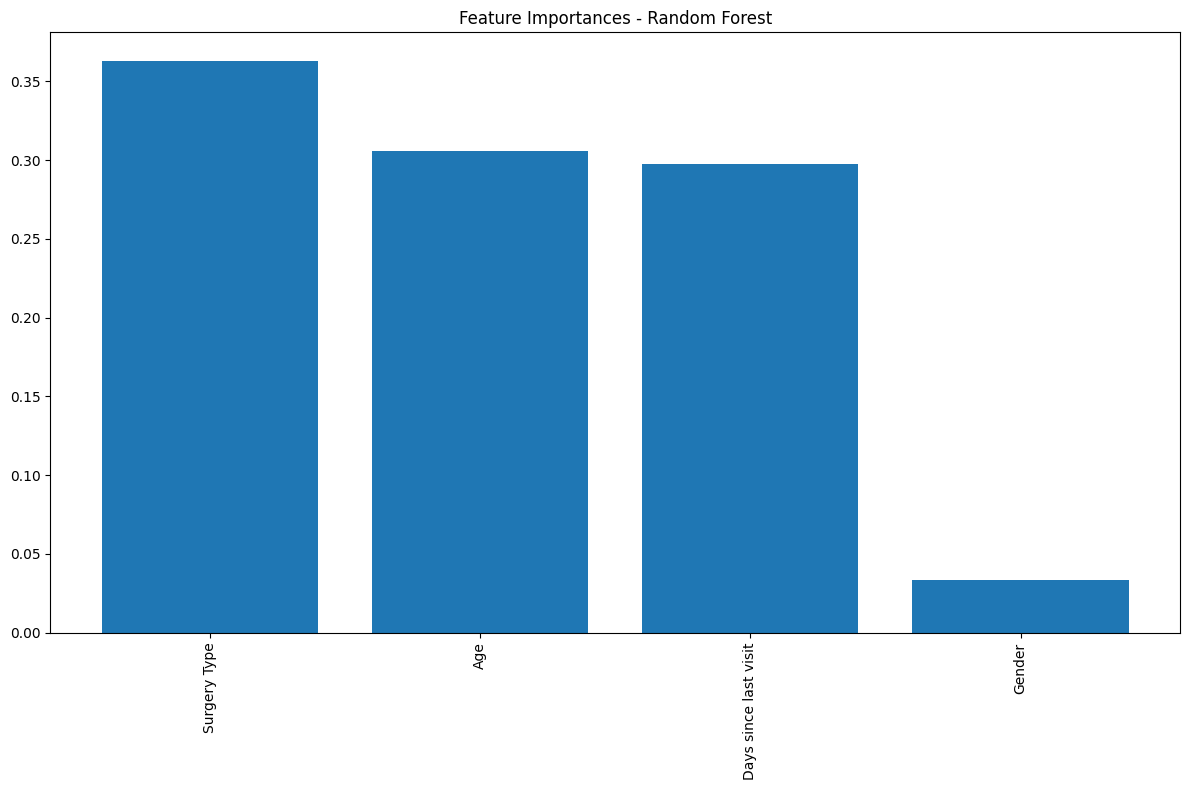

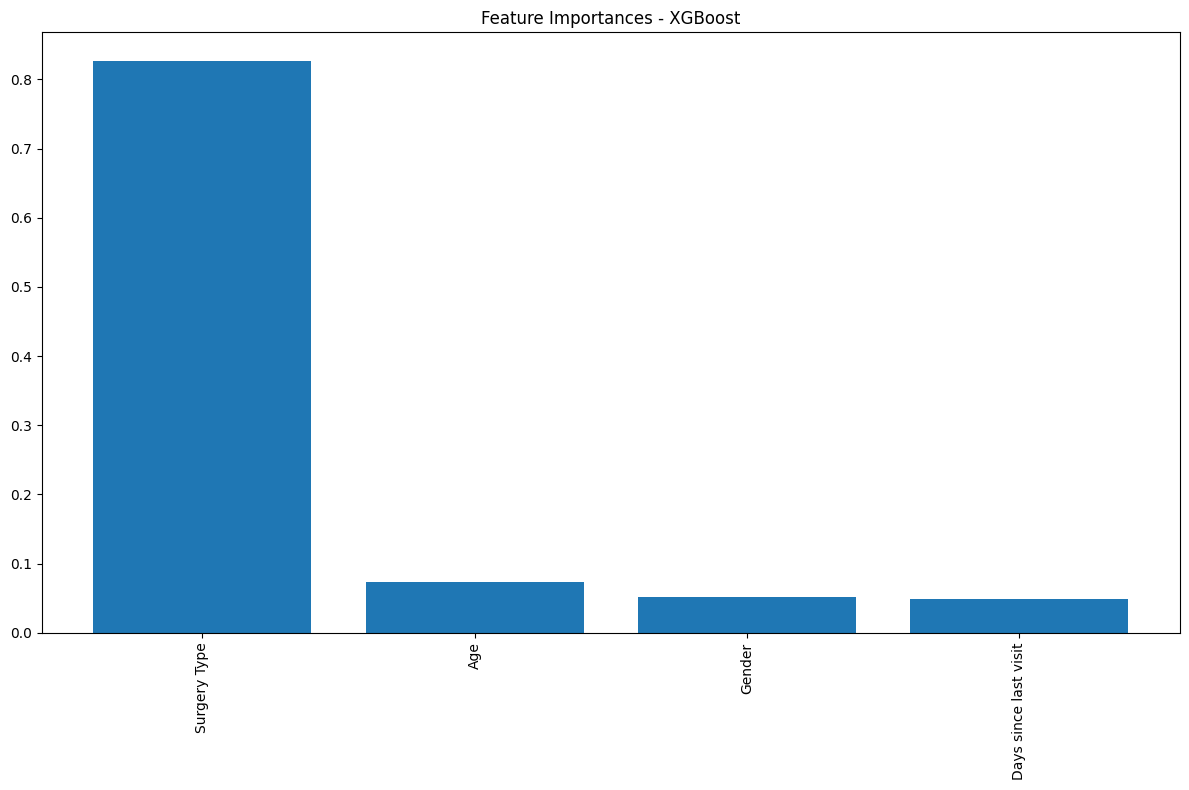

In [116]:
# Feature importance for Random Forest
importances_rf = best_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
features_rf = X.columns

plt.figure(figsize=(12, 8))
plt.title('Feature Importances - Random Forest')
plt.bar(range(X.shape[1]), importances_rf[indices_rf], align='center')
plt.xticks(range(X.shape[1]), features_rf[indices_rf], rotation=90)
plt.tight_layout()
plt.show()

# Feature importance for XGBoost
importances_xgb = best_xgb.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]
features_xgb = X.columns

plt.figure(figsize=(12, 8))
plt.title('Feature Importances - XGBoost')
plt.bar(range(X.shape[1]), importances_xgb[indices_xgb], align='center')
plt.xticks(range(X.shape[1]), features_xgb[indices_xgb], rotation=90)
plt.tight_layout()
plt.show()

Done hyperparamter tuning on tree classifiers usind GridSearchCV Module and from that it can be seen that for random forest is fitted on considering all the features but XGBoost is more biased on surgery_type